# Linear Regression with Scikit Learn

## Load Data 

Load Data from 'Advertising.csv'.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Advertising.csv")

##Creating Required Features

This step creates additional required features from given data loaded from dataframe.
Here, we create the following features:
1.   $(TV Advertisement)^2$
2.   $(Radio Advertisement)^2$


In [ ]:
data["TV_square"]=data["TV"]**2
data["Radio_square"]=data["Radio"]**2

## Forming the problem
$$Sales=\theta_0+\theta_1(TV Advertisements)+\theta_2(TV Advertisements)^2+\theta_3(Radio Advertisement)+\theta_4(Radio Advertisement)^2$$

Loading required data into $X$ and $Y$ for the model.

In [ ]:
X = data[["TV","TV_square","Radio","Radio_square"]]
y = data['Sales']
n = len(X)

## Data Split Data (Shuffle included!)

Using scikit-learn, we split the given data into **Training and Test data**.

This step gives us four sets:
$X_{train}$, $X_{test}$, $Y_{train}$ and $Y_{test}$



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##Checking data details

Here, we check the details for $X_{train}$ set.

In [ ]:
X_train

,TV,TV_square,Radio,Radio_square
23,228.3,52120.89,16.9,285.61
188,286.0,81796.00,13.9,193.21
166,17.9,320.41,37.6,1413.76
53,182.6,33342.76,46.2,2134.44
33,265.6,70543.36,20.0,400.00
...,...,...,...,...
52,216.4,46828.96,41.7,1738.89
192,17.2,295.84,4.1,16.81
193,166.8,27822.24,42.0,1764.00
108,13.1,171.61,0.4,0.16


##Training the model

Here, we use scikit-learn, to train our linear regression model. We also print the **Coeffecients** and **Intercept** of the trained model.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)
print("Coeffecients of the trained model:\n", model.coef_)
print("Intercept of the trained model: ", model.intercept_)

Coeffecients of the trained model:
 [ 8.19713528e-02 -1.21830535e-04  1.43317445e-01  1.01302166e-03]
Intercept of the trained model:  1.4395985349804459


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


## Predictions

Here, I use the trained model to predict the values of $Sales$, on **training and test data set**.

In [ ]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

##Plot of **Sales  V/S  (TV Advertisement)**

Here, I plot a scatter plot of the values of the $Sales$ as a function of $(TV Advertisement)$ and overlay the predicted values of the model.

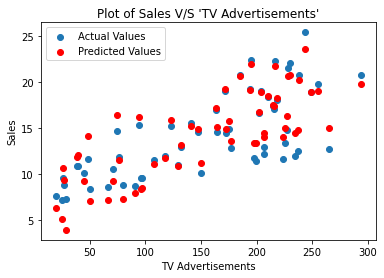

In [ ]:
plt.title("Plot of Sales V/S 'TV Advertisements'")
plt.xlabel("TV Advertisements")
plt.ylabel("Sales")
plt.scatter(X_test['TV'],y_test, label = "Actual Values")
plt.scatter(X_test['TV'],test_predictions,color='red', label = "Predicted Values")
plt.legend(loc = "upper left")

## Computation of loss over training and testing data

In [ ]:
from sklearn.metrics import mean_squared_error

###Loss over training data

Here, I compute the loss over the **training** data.

In [ ]:
MSE_Train = mean_squared_error(y_train,train_predictions)
print (MSE_Train)

2.533596597882472


###Loss over testing data

Here, I compute the loss over the **testing** data.

In [ ]:
MSE_Test = mean_squared_error(y_test,test_predictions)
print (MSE_Test)

1.6087402622423495
